## 1. Data Loading

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df = pd.read_excel('premiums.xlsx')
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [141]:
df.shape

(50000, 13)

In [142]:
df.columns = df.columns.str.replace(' ',"_").str.lower()
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


## 2. EDA and Data Cleaning

### 2.1 Handle Missing Values

In [143]:
df.isnull().sum()

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [144]:
df.dropna(inplace=True)
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

### 2.2 Handle Duplicates

In [145]:
df.duplicated().sum()

np.int64(0)

In [146]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [147]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


### 2.3 Data Cleaning: number_of_dependants
-We can see some negative values in number_of_dependants. We can replace them with positive numbers

In [148]:
df[df['number_of_dependants']<0].shape

(72, 13)

In [149]:
df[df['number_of_dependants']<0]['number_of_dependants'].unique()

array([-3, -1])

In [150]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    49976.000000
mean         1.717284
std          1.491953
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

### 2.4 Numeric Columns

#### 2.4.1 Univariate Analysis: Numeric Columns

#### Box plots for numeric columns

In [151]:
df.dtypes

age                       int64
gender                   object
region                   object
marital_status           object
number_of_dependants      int64
bmi_category             object
smoking_status           object
employment_status        object
income_level             object
income_lakhs              int64
medical_history          object
insurance_plan           object
annual_premium_amount     int64
dtype: object

In [152]:
numeric_cols = df.select_dtypes(include=['float64','Int64']).columns
numeric_cols

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

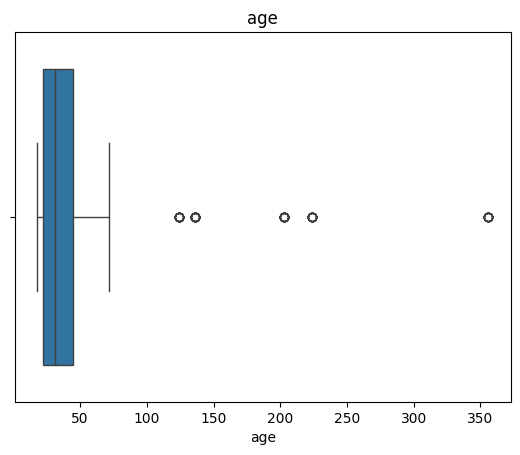

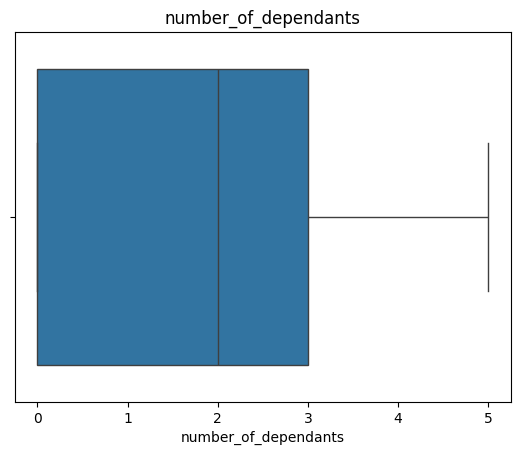

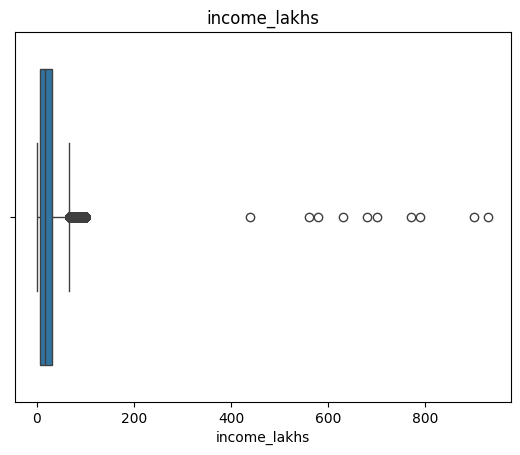

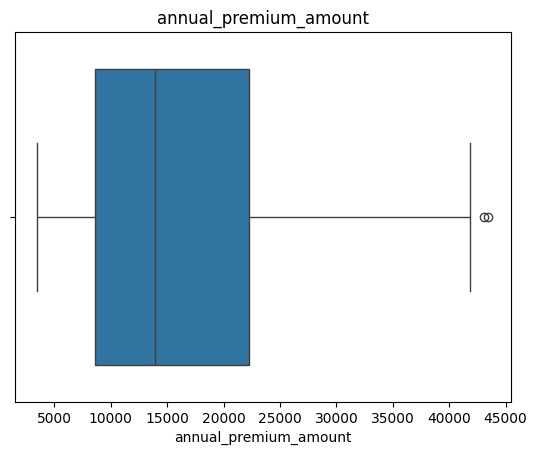

In [153]:
for col in numeric_cols:
    sns.boxplot(data = df, x = col)
    plt.title(col)
    plt.show()

#### 2.4.2 Outlier Treatment: Age Column

In [154]:
df[df['age']>100].shape

(58, 13)

In [155]:
df[df['age']>100]['age'].unique()

array([224, 124, 136, 203, 356])

In [156]:
df1 = df[df['age']<=100].copy()
print(df1.shape)
df1['age'].describe()

(49918, 13)


count    49918.000000
mean        34.401839
std         13.681600
min         18.000000
25%         22.000000
50%         31.000000
75%         45.000000
max         72.000000
Name: age, dtype: float64

#### 2.4.3 Outlier Treatment: Income Column

In [157]:
df['income_lakhs'].describe()

count    49976.000000
mean        23.021150
std         24.221794
min          1.000000
25%          7.000000
50%         17.000000
75%         31.000000
max        930.000000
Name: income_lakhs, dtype: float64

In [158]:
def get_iqr_bound(col):
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    return lower_bound, upper_bound

In [159]:
lower, upper = get_iqr_bound(df1['income_lakhs'])
lower,upper

(-29.0, 67.0)

In [160]:
df1[df1['income_lakhs']>upper].shape

(3559, 13)

- There will be many legimate records beyond the upper limit so we decide to use the quantile bound

In [161]:
quantile_threshold = df1['income_lakhs'].quantile(0.999)
quantile_threshold

np.float64(100.0)

In [162]:
df1[df1['income_lakhs']>quantile_threshold].shape

(10, 13)

In [163]:
df2  = df1[df1['income_lakhs']<=quantile_threshold].copy()
df2.shape

(49908, 13)

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')


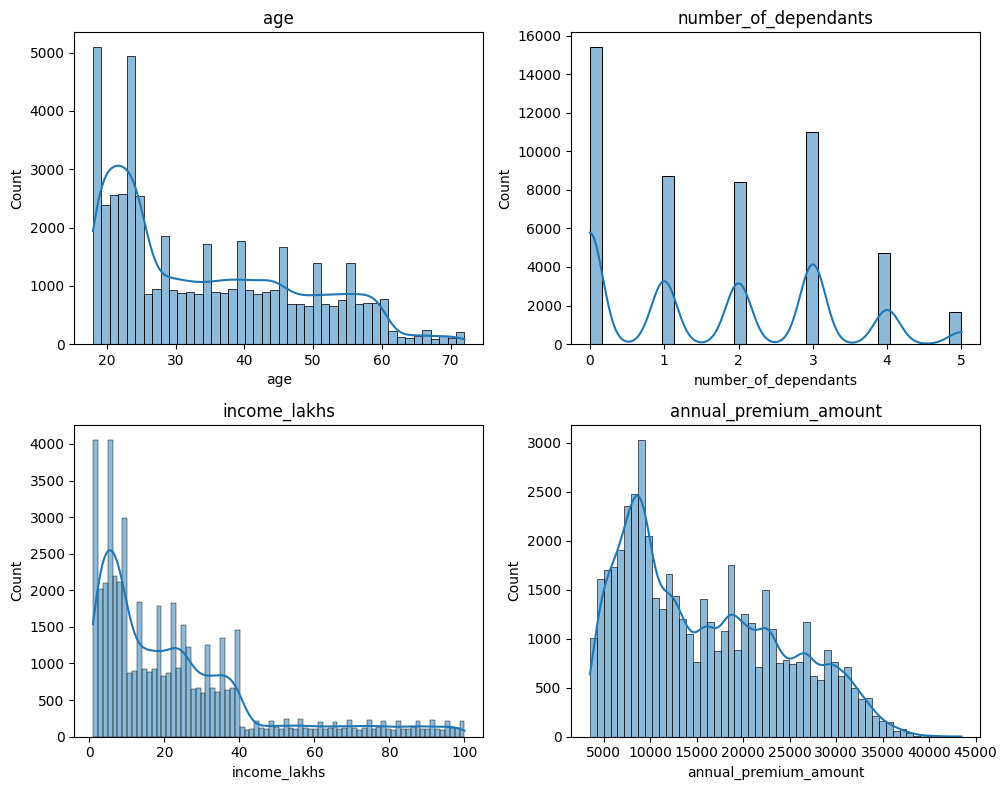

In [164]:
print(numeric_cols)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))  # Adjust the size as necessary

for i, column in enumerate(numeric_cols):
    ax = axs[i//2, i%2]  # Determines the position of the subplot in the grid
    sns.histplot(df2[column], kde=True, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [165]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339


#### 2.4.4 Bivariate Analysis: Numeric Columns

Index(['age', 'number_of_dependants', 'income_lakhs'], dtype='object')


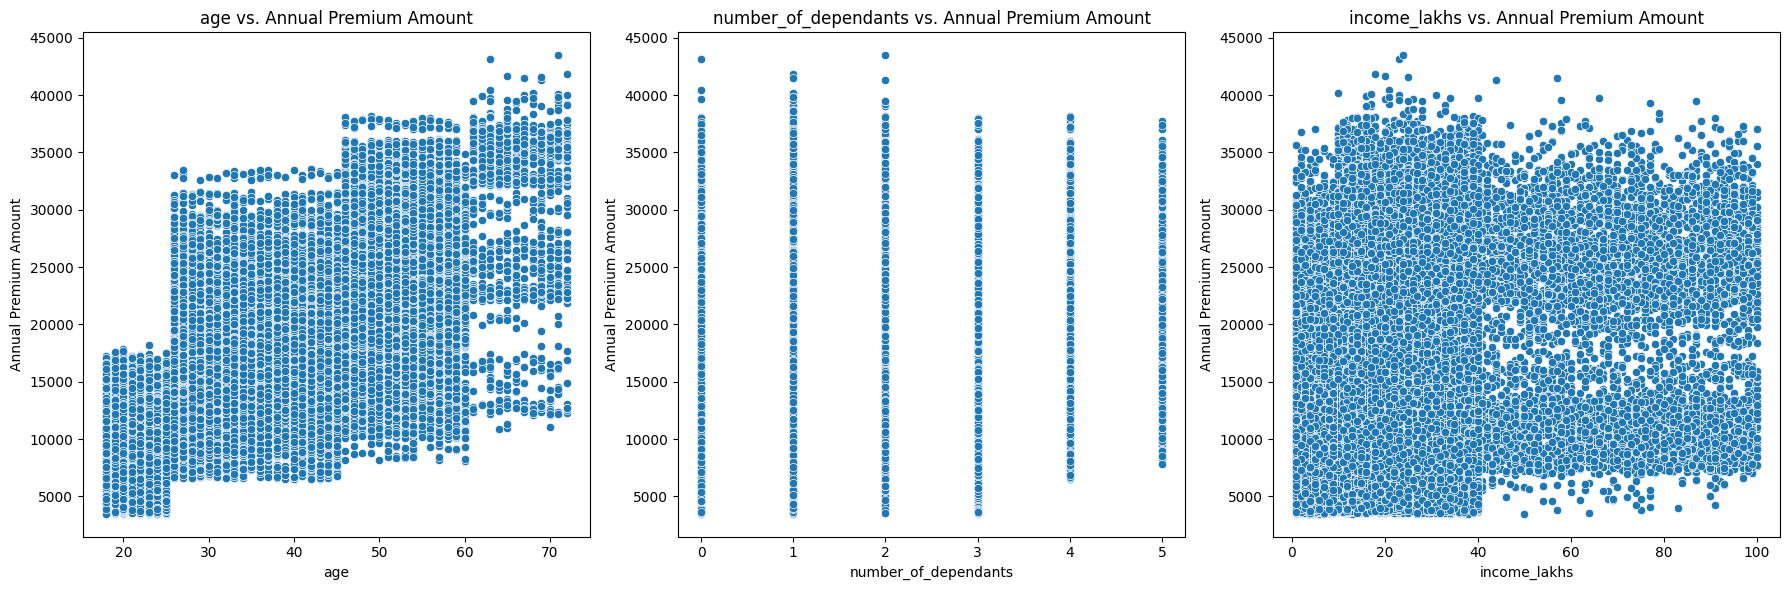

In [166]:
numerical_features =  numeric_cols.drop('annual_premium_amount')
print(numerical_features)

fig, axes = plt.subplots(1, len(numerical_features), figsize=(18, 6))  # Adjust figure size as necessary

for ax, column in zip(axes, numerical_features):
    sns.scatterplot(x=df2[column], y=df2['annual_premium_amount'], ax=ax)
    ax.set_title(f'{column} vs. Annual Premium Amount')
    ax.set_xlabel(column)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout()  # Adjust layout
plt.show()

### 2.5 Categorical Columns

In [167]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [168]:
for col in cat_cols:
    print(f"{col} :- {df2[col].unique()}")

gender :- ['Male' 'Female']
region :- ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status :- ['Unmarried' 'Married']
bmi_category :- ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status :- ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status :- ['Salaried' 'Self-Employed' 'Freelancer']
income_level :- ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history :- ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan :- ['Bronze' 'Silver' 'Gold']


#### 2.5.1 Making Smoking_status feature Uniform

In [169]:
df2['smoking_status'] = df2['smoking_status'].replace({
    'Smoking=0':'No Smoking',
    'Does Not Smoke':'No Smoking',
    'Not Smoking':'No Smoking'
})
df2['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

#### 2.5.2 Univarate Analysis

In [170]:
pct = df2['gender'].value_counts(normalize=True)*100
pct

gender
Male      54.963132
Female    45.036868
Name: proportion, dtype: float64

<Axes: xlabel='gender'>

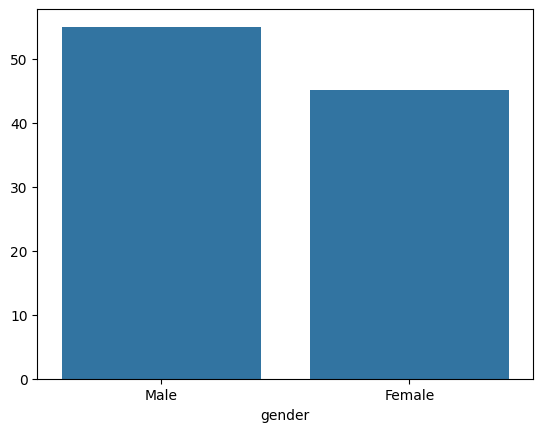

In [171]:
sns.barplot(x=pct.index, y = pct.values)

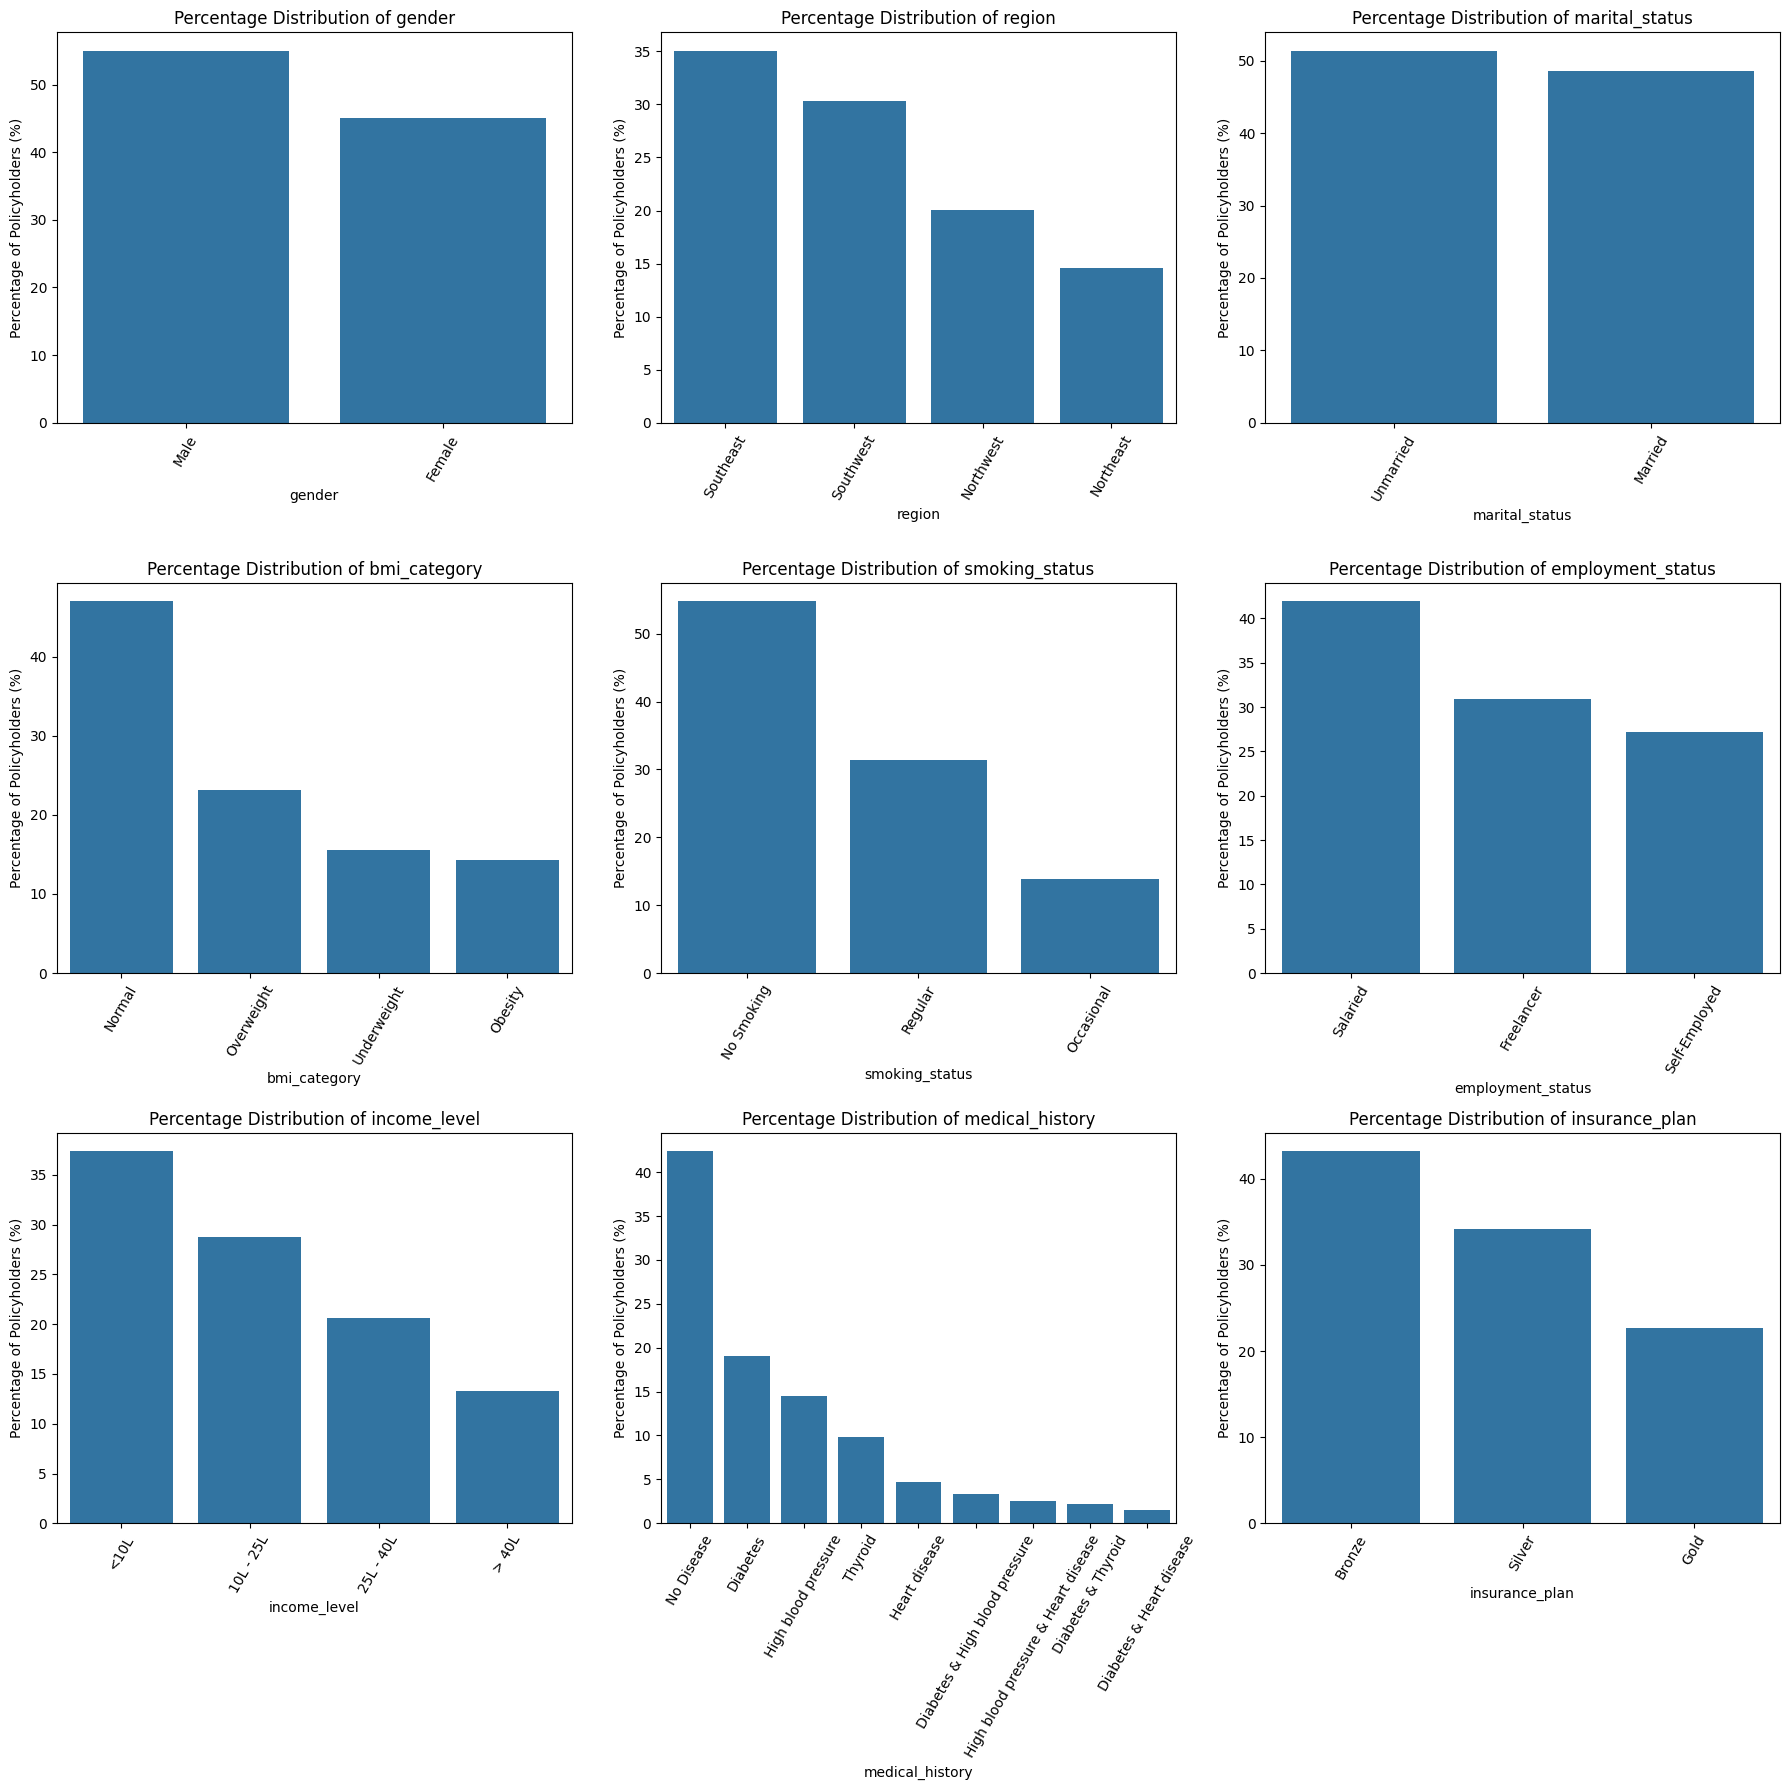

In [172]:

fig, axes = plt.subplots(3, 3, figsize=(18, 18))  # Adjust figure size as necessary
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier iteration

for ax, column in zip(axes, cat_cols):
    # Calculate the percentage distribution of each category
    category_counts = df2[column].value_counts(normalize=True) * 100  # normalize=True gives the relative frequencies
    
    # Plotting the distribution using barplot
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.tick_params(axis='x', rotation=60)
    ax.set_xlabel(column)  # Set xlabel to the column name for clarity

plt.tight_layout()  # Adjusts plot parameters for better fit in the figure window
plt.show()

#### 2.5.3 Bivariate Analysis

In [173]:
crosstab = pd.crosstab(df2['income_level'],df2['insurance_plan'])
crosstab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,5307,3880,5182
25L - 40L,3683,2840,3750
<10L,12226,931,5486
> 40L,329,3653,2641


<Axes: xlabel='income_level'>

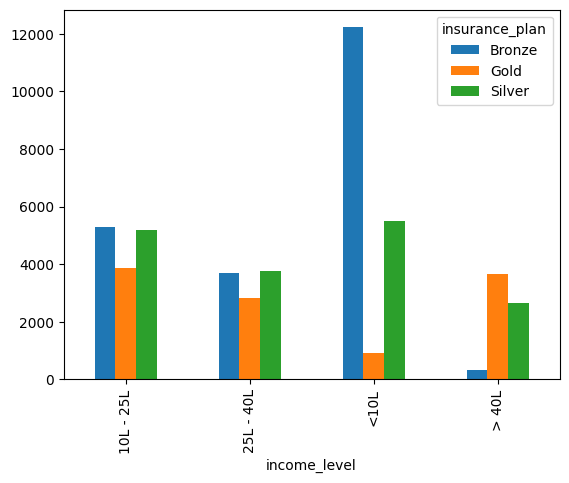

In [174]:
crosstab.plot(kind='bar')

<Axes: xlabel='insurance_plan', ylabel='income_level'>

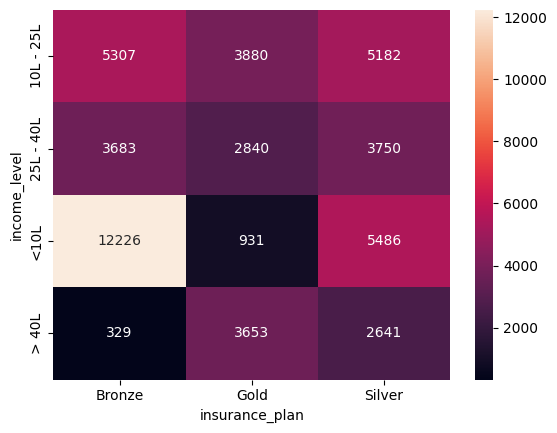

In [175]:
sns.heatmap(crosstab,annot=True,fmt='d')

## 3. Feature Engineering

In [176]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [177]:
df['medical_history'].unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

### 3.1 Medical History to Risk Score

In [178]:
risk_score = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

In [179]:
df2[['disease1','disease2']] = df['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
21684,47,Male,Southwest,Unmarried,0,Overweight,No Smoking,Salaried,10L - 25L,18,Diabetes,Gold,28158,diabetes,None
14382,30,Male,Southwest,Married,4,Normal,Regular,Self-Employed,10L - 25L,11,No Disease,Silver,16801,no disease,None
32369,49,Male,Southwest,Married,2,Normal,Occasional,Self-Employed,25L - 40L,40,High blood pressure,Bronze,11845,high blood pressure,None
3980,38,Female,Southwest,Married,4,Overweight,Occasional,Salaried,10L - 25L,16,Thyroid,Silver,18273,thyroid,None
30774,33,Female,Southeast,Married,2,Normal,No Smoking,Salaried,<10L,3,Diabetes,Bronze,9215,diabetes,None


In [180]:
df2['disease1'] = df2['disease1'].fillna('none')
df2['disease2'] = df2['disease2'].fillna('none')
df2['total_rist_score'] = 0
df2.sample(2)


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_rist_score
10966,20,Female,Southwest,Unmarried,0,Underweight,No Smoking,Salaried,> 40L,87,No Disease,Gold,11293,no disease,none,0
597,51,Female,Northwest,Unmarried,0,Obesity,Regular,Salaried,25L - 40L,35,Heart disease,Bronze,21338,heart disease,none,0


In [181]:
for disease in ['disease1','disease2']:
    df2['total_rist_score'] += df2[disease].map(risk_score)
    
df2['total_rist_score'].describe()

count    49908.000000
mean         4.085638
std          4.023878
min          0.000000
25%          0.000000
50%          5.000000
75%          6.000000
max         14.000000
Name: total_rist_score, dtype: float64

In [182]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_rist_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,none,6
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,none,0
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,6


In [183]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2['normalized_rist_score'] = scaler.fit_transform(df2[['total_rist_score']])

df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_rist_score,normalized_rist_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,none,0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,6,0.428571


### 3.2 Insurance Plan Label Encoding

In [184]:
df2['insurance_plan'].unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [185]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze':1,'Silver':2, 'Gold':3})
df2['insurance_plan'].unique()

array([1, 2, 3])

### 3.3 Income Level Label Encoding

In [186]:
df2['income_level'].unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [187]:
df2['income_level'] = df2['income_level'].map({'<10L':1, '10L - 25L':2, '> 40L':4, '25L - 40L':3})
df2['income_level'].unique()

array([1, 2, 4, 3])

### 3.3 One Hot Encoding

In [188]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df3 = pd.get_dummies(df2, columns=nominal_cols, drop_first=True, dtype=int)
df3.head(3)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_rist_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,diabetes,none,6,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,diabetes,none,6,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,high blood pressure,none,6,...,0,0,0,0,0,0,0,0,0,1


## 4. Feature Selection

In [190]:
df4 = df3.drop(['medical_history','disease1', 'disease2', 'total_rist_score'],axis=1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_rist_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,2,13365,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


## 5. Check Multicolinearity

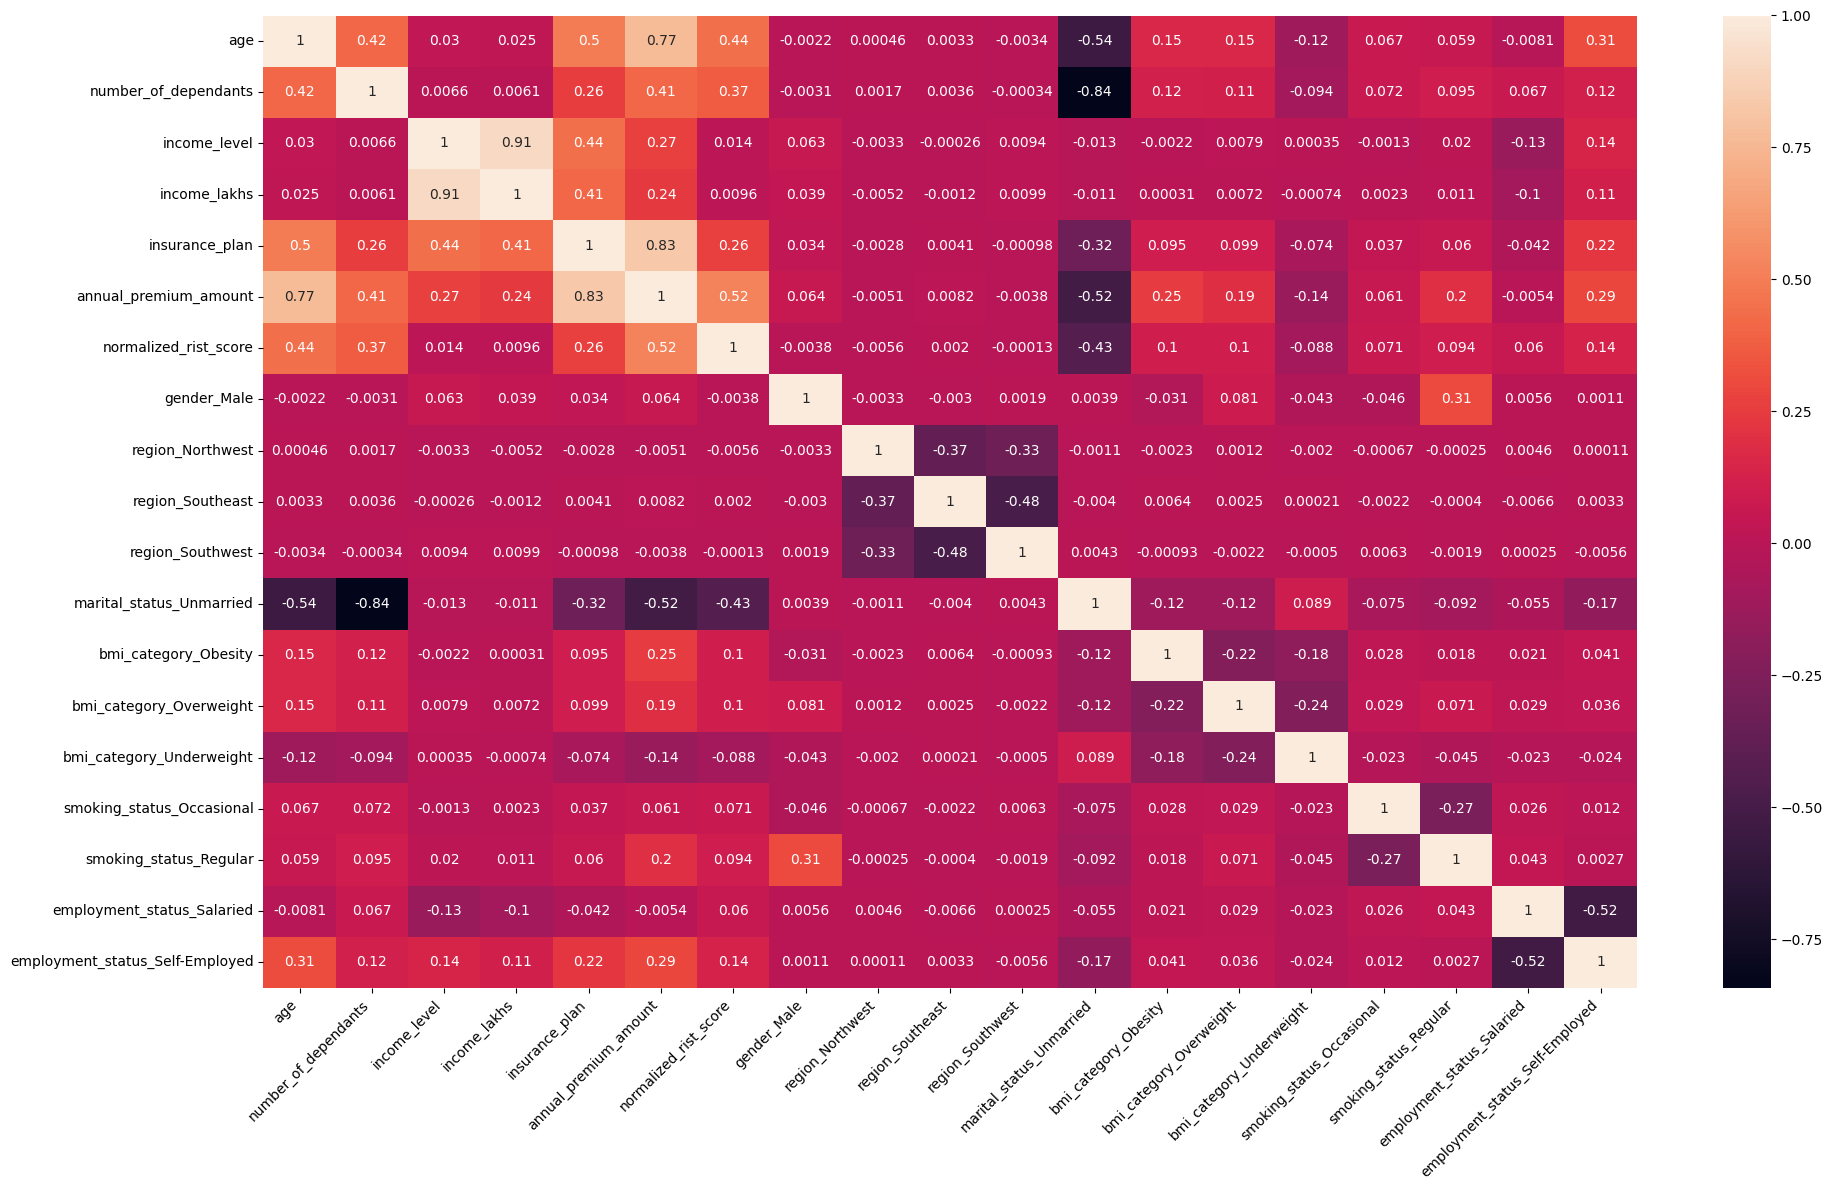

In [191]:
cm = df4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [192]:
X = df4.drop(columns=['annual_premium_amount'],axis=1)
y = df4['annual_premium_amount']


In [193]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['age','number_of_dependants', 'income_level',  'income_lakhs', 'insurance_plan']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_rist_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.00000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000
mean,0.303733,0.343528,0.365900,0.221110,0.397401,0.291831,0.549631,0.20093,0.350385,0.303038,0.513545,0.143183,0.231245,0.155326,0.138274,0.313857,0.419412,0.272041
std,0.253363,0.298406,0.349711,0.223946,0.392459,0.287420,0.497536,0.40070,0.477095,0.459576,0.499822,0.350263,0.421633,0.362219,0.345191,0.464064,0.493468,0.445015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.000000,0.000000,0.060606,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240741,0.400000,0.333333,0.161616,0.500000,0.357143,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.600000,0.666667,0.303030,0.500000,0.428571,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [195]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [196]:
calculate_vif(X)

,Column,VIF
0,age,4.567634
1,number_of_dependants,4.534650
2,income_level,12.450675
3,income_lakhs,11.183367
4,insurance_plan,3.584752
5,normalized_rist_score,2.687610
6,gender_Male,2.421496
7,region_Northwest,2.102556
8,region_Southeast,2.922414
9,region_Southwest,2.670666


In [197]:
calculate_vif(X.drop(columns=['income_level'],axis=1))

,Column,VIF
0,age,4.545825
1,number_of_dependants,4.526598
2,income_lakhs,2.480563
3,insurance_plan,3.445682
4,normalized_rist_score,2.687326
5,gender_Male,2.409980
6,region_Northwest,2.100789
7,region_Southeast,2.919775
8,region_Southwest,2.668314
9,marital_status_Unmarried,3.393718


- we will drop income_lakhs due to high VIF value

In [198]:
X_reduced = X.drop('income_level', axis="columns")

## 6. Model Training

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# shape of the X_train, X_test, y_train, y_test features
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (34935, 17)
x test:  (14973, 17)
y train:  (34935,)
y test:  (14973,)


### 6.1 Linear Regression

In [201]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
train_score = model_lr.score(X_train,y_train)
test_score = model_lr.score(X_test,y_test)
train_score,test_score

(0.9280957176093705, 0.9283765993531428)

In [225]:
from sklearn.metrics import mean_squared_error

y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Linear Regression ==> MSE:  5056639.130347775 RMSE:  2248.6972073509087


In [202]:
model_lr.intercept_

np.float64(4701.438053965807)

#### 6.1.1 Feature Importance

In [203]:
model_lr.coef_

array([11236.4082633 ,  -536.61172956,  -353.97067084, 12515.43782972,
        4846.88626348,   121.53023031,   -34.50219135,    27.97504587,
         -23.47372614,  -821.78088646,  3356.07750448,  1613.1421694 ,
         364.31350886,   722.41051531,  2261.97816483,   149.57179545,
         378.25130285])

In [204]:
X_test.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'normalized_rist_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

In [215]:
feature_importane = model_lr.coef_
coeff_df = pd.DataFrame(data = feature_importane, index=X_test.columns, columns=['Coeffiecient'])
coeff_df = coeff_df.sort_values(by=['Coeffiecient'],ascending=False)
coeff_df

,Coeffiecient
insurance_plan,12515.437830
age,11236.408263
normalized_rist_score,4846.886263
bmi_category_Obesity,3356.077504
smoking_status_Regular,2261.978165
bmi_category_Overweight,1613.142169
smoking_status_Occasional,722.410515
employment_status_Self-Employed,378.251303
bmi_category_Underweight,364.313509
employment_status_Salaried,149.571795


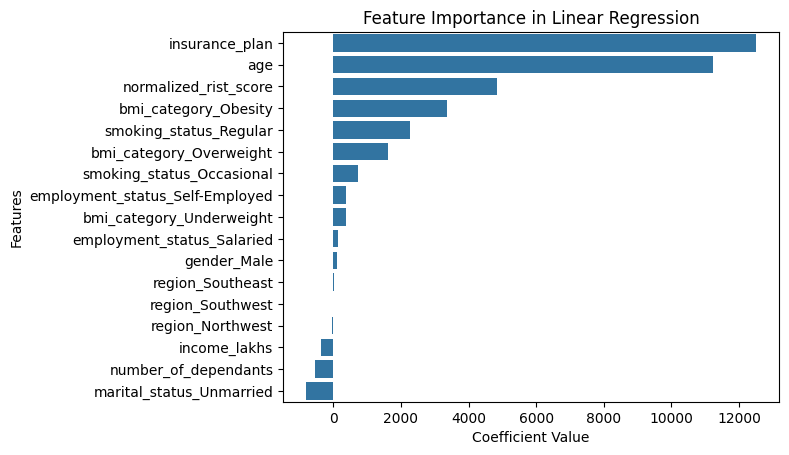

In [220]:
sns.barplot(data  = coeff_df , y = coeff_df.index, x = 'Coeffiecient')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance in Linear Regression')
plt.show()

### 6.2 Rigde Regression

- No Significate Improvement in the score

In [223]:
from sklearn.linear_model import Ridge,Lasso
model_ridge = Ridge(alpha=5)
model_ridge.fit(X_train,y_train)
train_score = model_ridge.score(X_train,y_train)
test_score = model_ridge.score(X_test,y_test)
train_score,test_score

(0.9280947786299393, 0.9283753098625959)

In [228]:
y_pred = model_ridge.predict(X_test)

mse_rg = mean_squared_error(y_test, y_pred)
rmse_rg = np.sqrt(mse_lr)
print("Ridge Regression ==> MSE: ", mse_rg, "RMSE: ", rmse_rg)

Ridge Regression ==> MSE:  5056730.168867291 RMSE:  2248.6972073509087


### 6.3 XGBoost

In [224]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor()
model_xgb .fit(X_train,y_train)
train_score = model_xgb .score(X_train,y_train)
test_score = model_xgb.score(X_test,y_test)
train_score,test_score

(0.9861041903495789, 0.9807721972465515)

In [227]:
y_pred = model_xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
print("XGBOOST ==> MSE: ", mse_xgb, "RMSE: ", rmse_xgb)

XGBOOST ==> MSE:  1357488.75 RMSE:  1165.1131919260033


#### 6.3.1 Hyperparameter Tuning

In [230]:
from sklearn.model_selection import RandomizedSearchCV

model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
random_search.best_score_

np.float64(0.9810737768809)

In [231]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [232]:
best_model = random_search.best_estimator_
best_model

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


#### 6.3.2 Feature Importance
- Intrepretation is not as straight as Linear Model

In [233]:
feature_importane = best_model.feature_importances_

coeff_df = pd.DataFrame(data = feature_importane, index=X_test.columns, columns=['Coeffiecient'])
coeff_df = coeff_df.sort_values(by=['Coeffiecient'],ascending=False)
coeff_df

,Coeffiecient
insurance_plan,0.513155
age,0.412953
normalized_rist_score,0.018843
smoking_status_Regular,0.018554
bmi_category_Obesity,0.017287
bmi_category_Overweight,0.011938
smoking_status_Occasional,0.004143
bmi_category_Underweight,0.001185
gender_Male,0.000303
employment_status_Self-Employed,0.000286


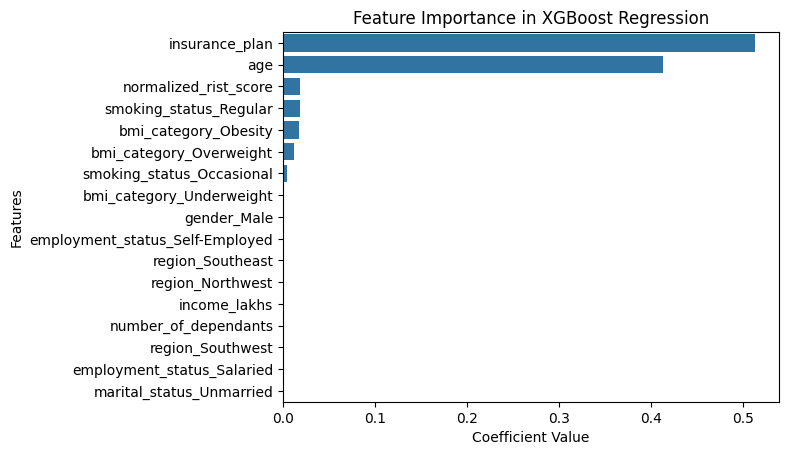

In [234]:
sns.barplot(data  = coeff_df , y = coeff_df.index, x = 'Coeffiecient')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance in XGBoost Regression')
plt.show()

## 7 Error Analysis

In [237]:
y_pred = best_model.predict(X_test)

residuals =y_pred - y_test
residuals_pct = residuals * 100 / y_test

results_df = pd.DataFrame({
    'actual': y_test, 
    'predicted': y_pred, 
    'diff': residuals, 
    'diff_pct': residuals_pct
})
results_df.head()

,actual,predicted,diff,diff_pct
24098,9246,9547.453125,301.453125,3.260363
201,11664,13488.259766,1824.259766,15.640087
25471,10472,7417.219727,-3054.780273,-29.170935
32500,26267,25508.873047,-758.126953,-2.886233
30832,9106,9547.453125,441.453125,4.847937


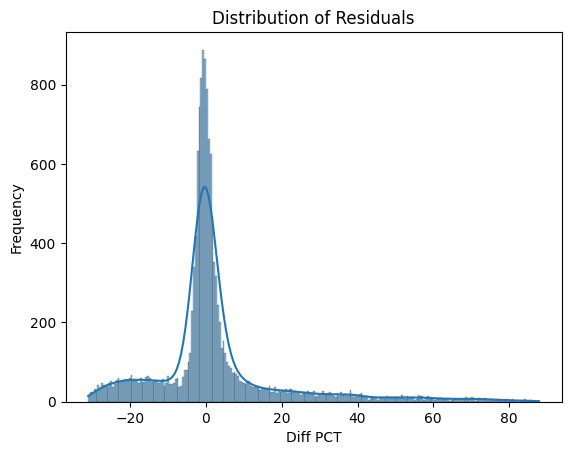

In [238]:
sns.histplot(results_df['diff_pct'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Diff PCT')
plt.ylabel('Frequency')
plt.show()

In [239]:
X_test.shape

(14973, 17)

### 7.1 More than 10% 

In [240]:
extreme_error_threshold = 10  # You can adjust this threshold based on your domain knowledge or requirements
extreme_results_df = results_df[np.abs(results_df['diff_pct']) > extreme_error_threshold]
extreme_results_df.head()

,actual,predicted,diff,diff_pct
201,11664,13488.259766,1824.259766,15.640087
25471,10472,7417.219727,-3054.780273,-29.170935
47939,11996,13450.725586,1454.725586,12.126755
26239,4436,6649.229492,2213.229492,49.892459
16907,8952,10888.099609,1936.099609,21.627565


In [241]:
extreme_results_df.shape

(4466, 4)

In [242]:
extreme_errors_pct = extreme_results_df.shape[0]*100/X_test.shape[0]
extreme_errors_pct

29.827021972884527

- We have 30% extreme errors which means for 30% customers we will either overcharge or undercharge by 10% or more

### 7.2 More than 50%
- There will be about 549 customers whom we will overcharge or underchage by more than 50%

In [243]:
extreme_results_df[abs(extreme_results_df.diff_pct)>50].sort_values("diff_pct",ascending=False)

,actual,predicted,diff,diff_pct
25207,3501,6578.916016,3077.916016,87.915339
29904,3503,6578.916016,3075.916016,87.808051
48801,3516,6578.916016,3062.916016,87.113652
10288,3517,6578.916016,3061.916016,87.060450
23975,3520,6578.916016,3058.916016,86.901023
...,...,...,...,...
17089,4960,7456.396484,2496.396484,50.330574
14376,4887,7345.736816,2458.736816,50.311783
4067,4846,7276.824707,2430.824707,50.161467
23368,4360,6544.921875,2184.921875,50.112887


### 7.3 More Analysis in Daya

In [244]:
X_test.index

Index([24098,   201, 25471, 32500, 30832, 11631, 12814, 33373,  5408, 47939,
       ...
        7746, 25417,  8104, 11125,   679, 12123, 31891,  6713, 16957, 15109],
      dtype='int64', length=14973)

In [245]:
extreme_results_df.index

Index([  201, 25471, 47939, 26239, 16907, 16861,  5849, 25369,  8403, 38677,
       ...
       39176, 23789, 24121,  4068, 41535, 21893, 37321, 43822, 24771,  7746],
      dtype='int64', length=4466)

In [247]:
extreme_error_df = X_test.loc[extreme_results_df.index]
extreme_error_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_rist_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
201,0.129630,0.2,0.636364,1.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0
25471,0.074074,0.0,0.010101,0.0,0.0,1,1,0,0,1,0,1,0,0,1,1,0
47939,0.111111,0.0,0.424242,1.0,0.0,0,1,0,0,1,0,0,1,0,0,1,0
26239,0.037037,0.0,0.292929,0.0,0.0,1,1,0,0,1,0,0,1,0,0,0,0
16907,0.111111,0.0,0.606061,0.5,0.0,1,0,0,0,1,0,0,1,0,1,0,0


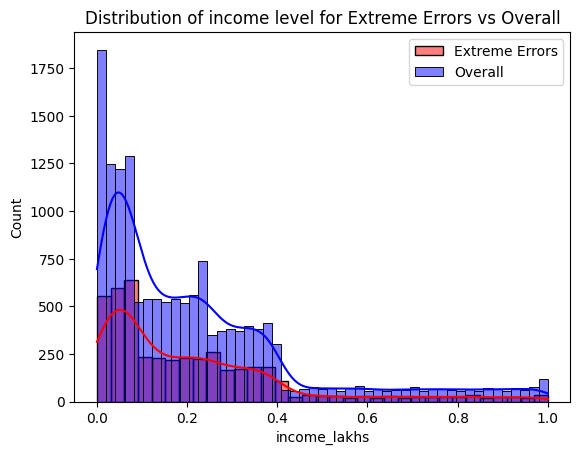

In [256]:
sns.histplot(extreme_error_df['income_lakhs'], color='red', label='Extreme Errors', kde=True)
sns.histplot(X_test['income_lakhs'], color='blue', label='Overall', alpha=0.5, kde=True)
plt.legend()
plt.title(f'Distribution of income level for Extreme Errors vs Overall')
plt.show()

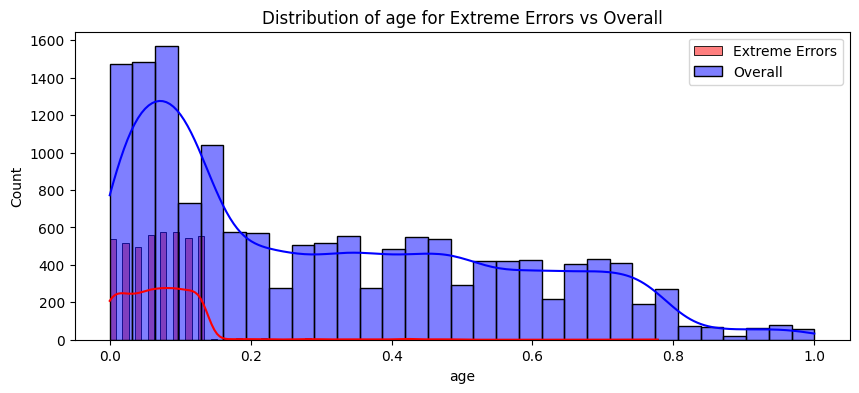

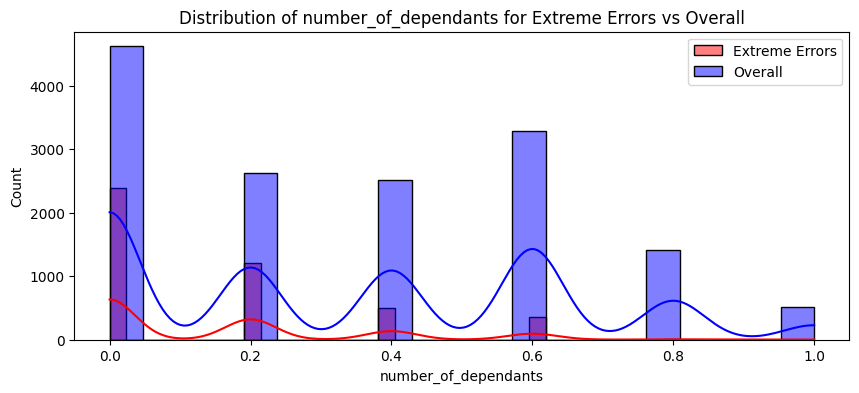

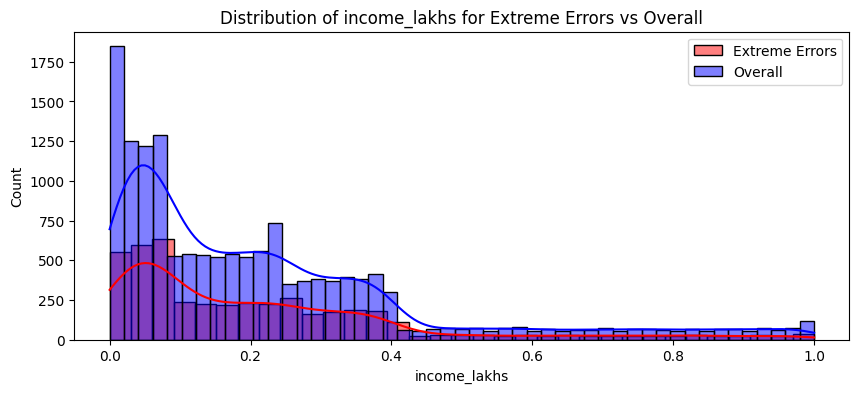

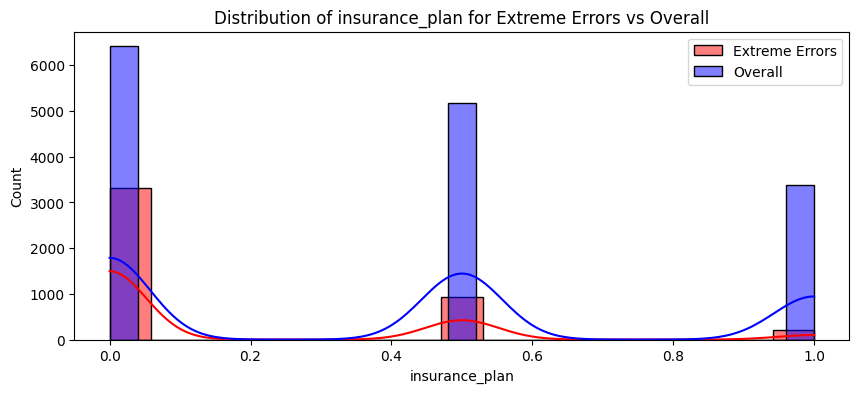

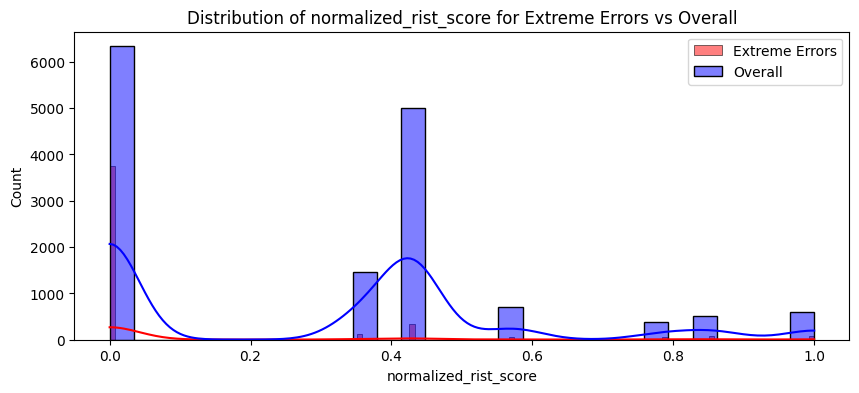

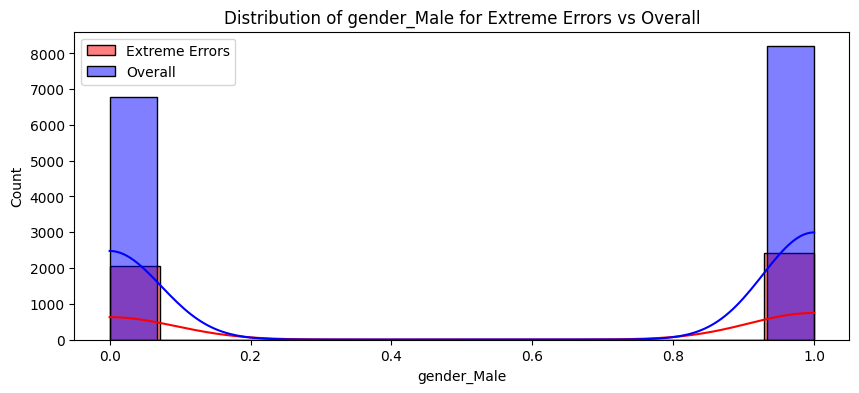

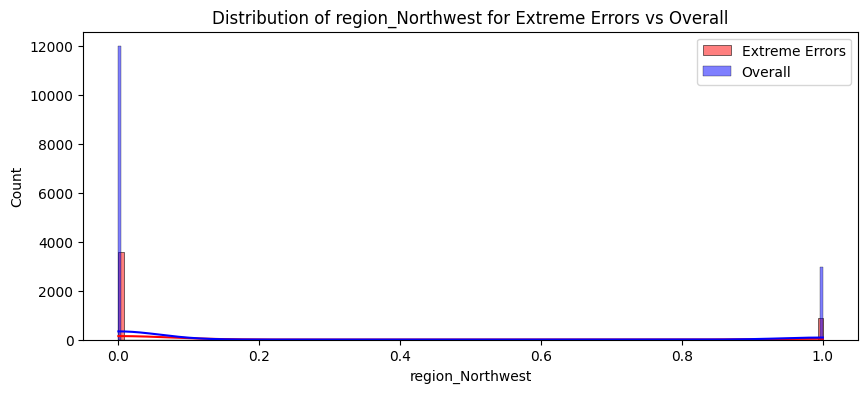

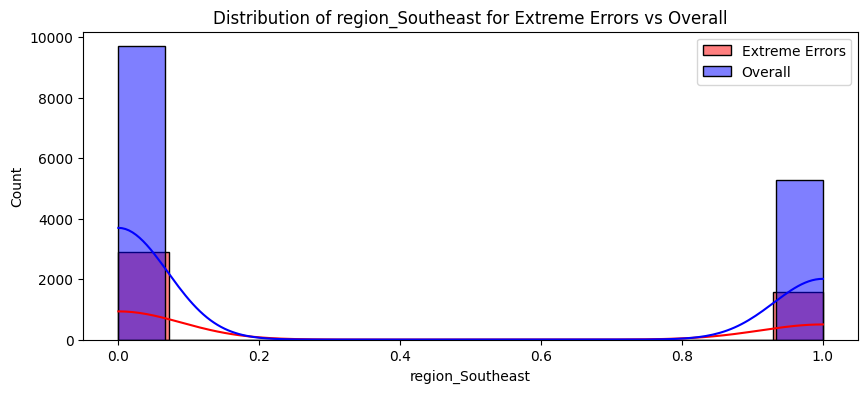

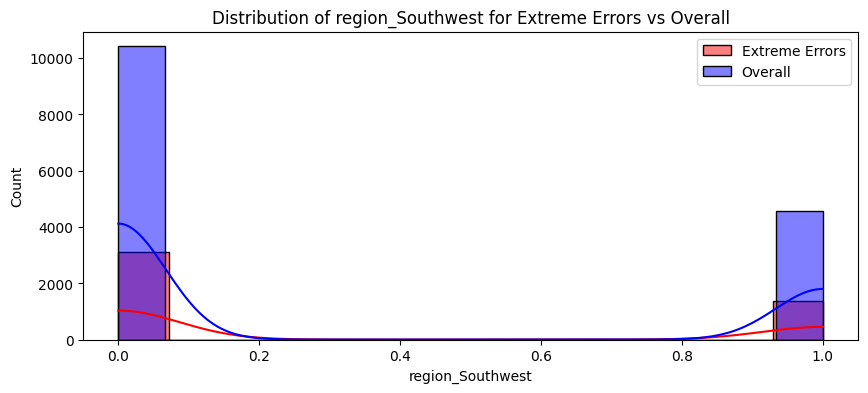

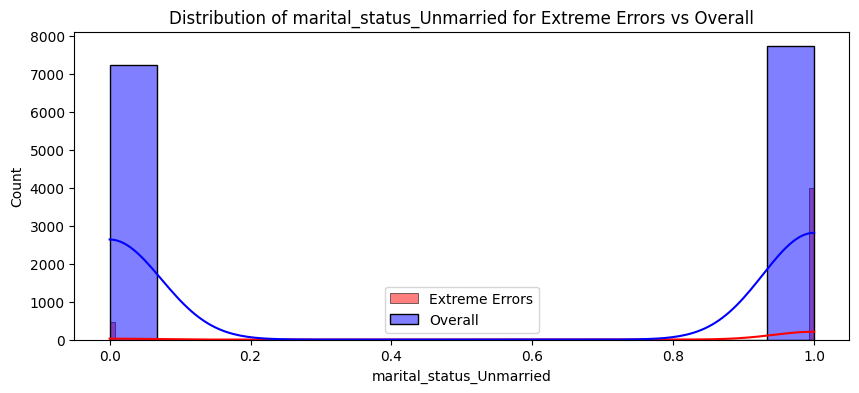

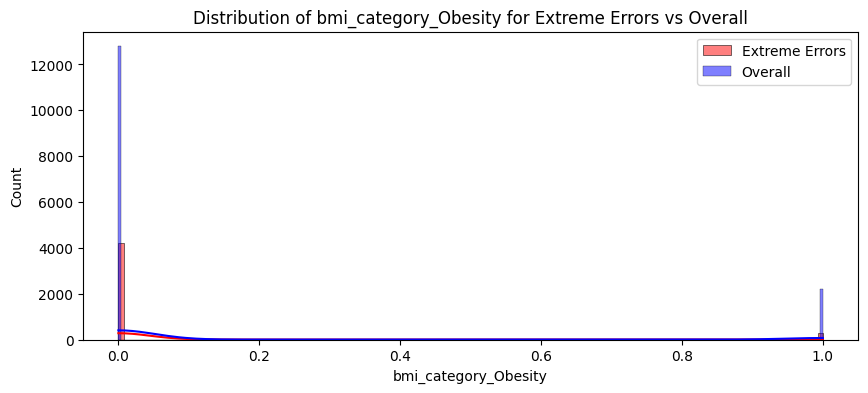

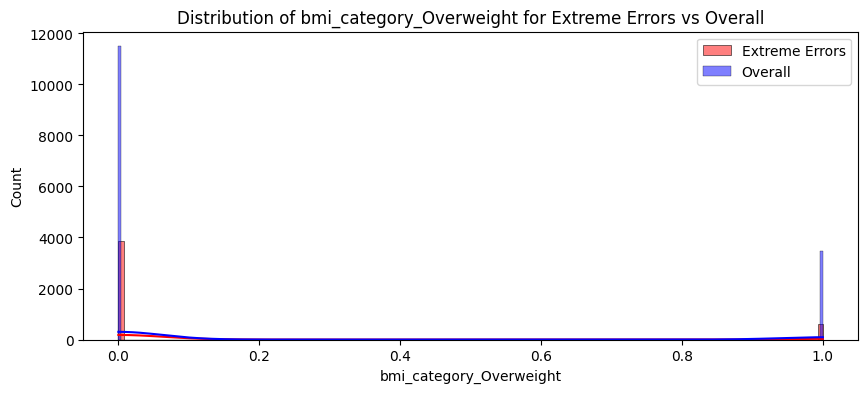

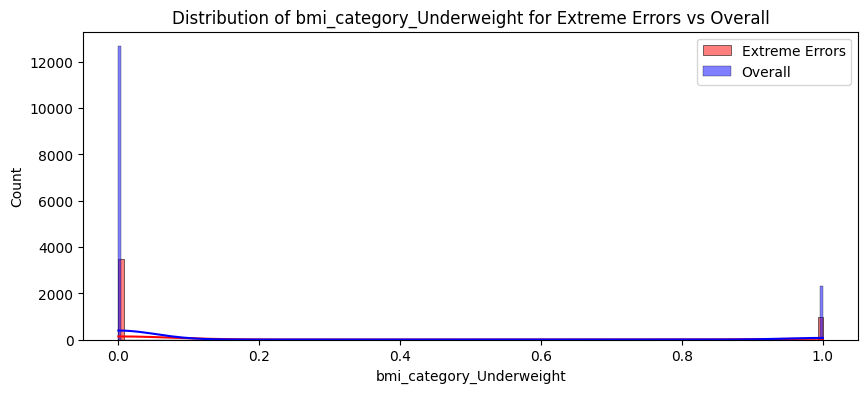

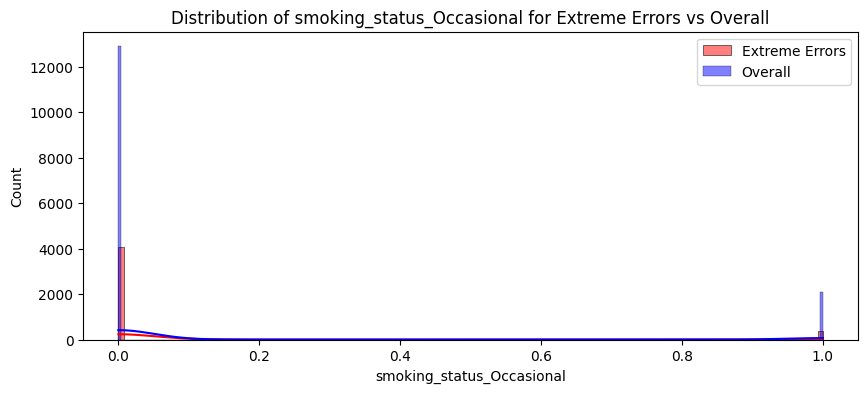

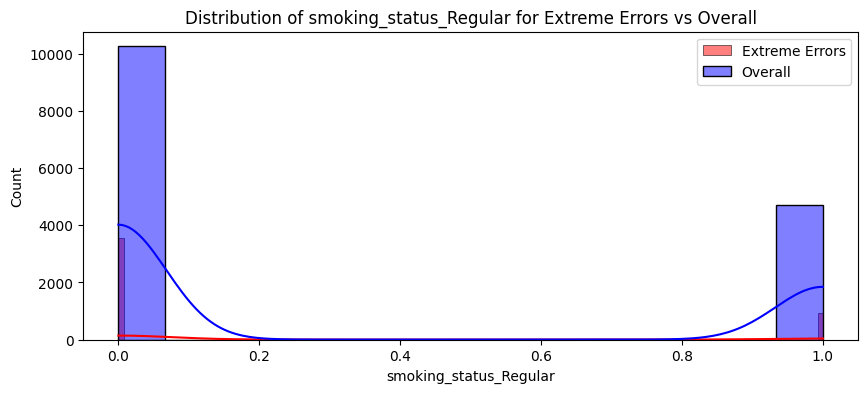

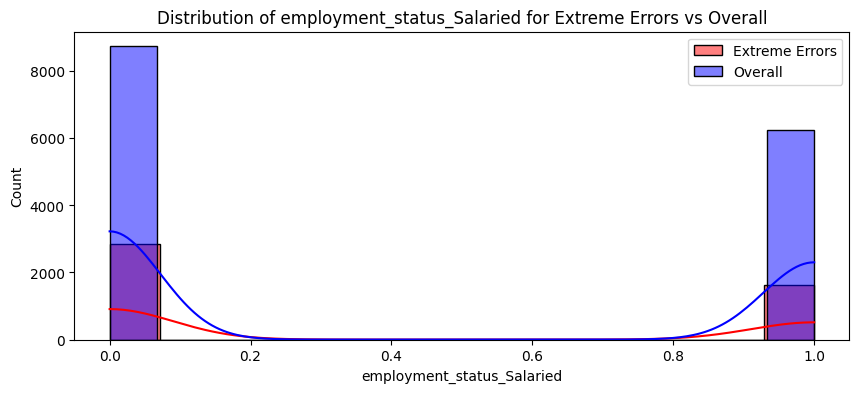

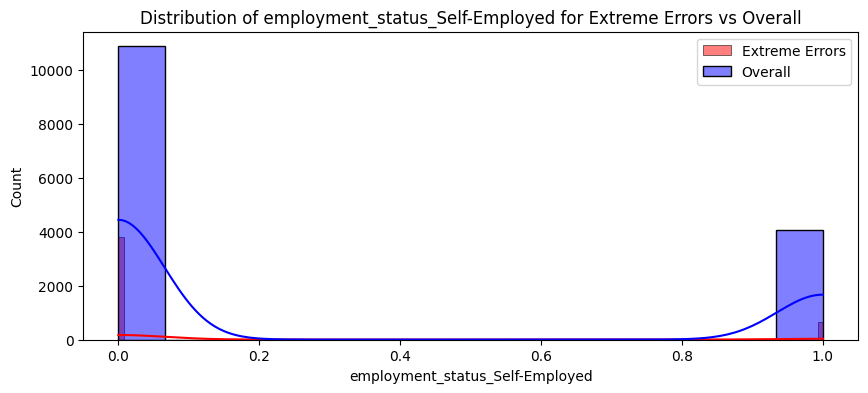

In [250]:
for feature in X_test.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(extreme_error_df[feature], color='red', label='Extreme Errors', kde=True)
    sns.histplot(X_test[feature], color='blue', label='Overall', alpha=0.5, kde=True)
    plt.legend()
    plt.title(f'Distribution of {feature} for Extreme Errors vs Overall')
    plt.show()

- Age showing that there is hue error in lower age group

<Axes: xlabel='age', ylabel='Count'>

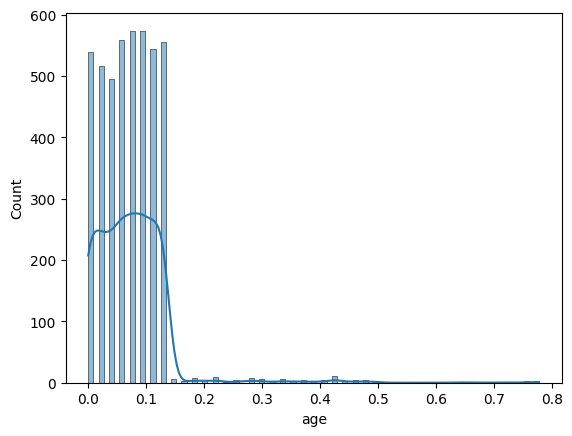

In [251]:
sns.histplot(extreme_error_df.age, kde=True   )

### 7.4 Reverse Scaling
- Scaling back using the same scaler
- Income Level was removed to need to keep back

In [252]:
extreme_error_df['income_level']=-1

In [253]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_error_df[cols_to_scale])
df_reversed.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,25.0,1.0,-2.0,64.0,3.0
1,22.0,0.0,-2.0,2.0,1.0
2,24.0,0.0,-2.0,43.0,3.0
3,20.0,0.0,-2.0,30.0,1.0
4,24.0,0.0,-2.0,61.0,2.0


<Axes: xlabel='age', ylabel='Count'>

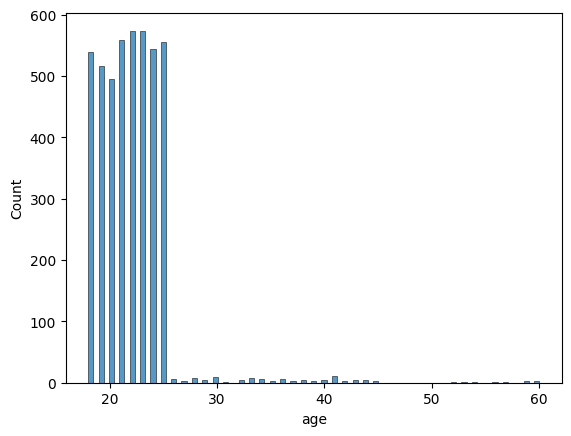

In [254]:
sns.histplot(df_reversed.age)

In [255]:
df_reversed.age.quantile(0.97)

np.float64(25.0)

- This shows that majority of the extreme errors are coming from young age group (i.e. <25 years of age). We need to may be build a separate model for this segment